## Initialize

In [1]:
import sys
sys.dont_write_bytecode = True

# Import libraries
import numpy as np
import os
import warnings
import random
from sklearn.metrics import accuracy_score, f1_score

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from Utils import (
    load_nusax_dataset, 
    create_text_vectorizer, 
    build_lstm_model, 
    evaluate_model,
    plot_loss_curves
)
from Layer.scratch_layers import LSTMModel
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
tf.keras.utils.set_random_seed(42)

In [3]:
# Load Dataset
train_ds, val_ds, test_ds = load_nusax_dataset(
    data_path="data/nusax_sentiment_id",
    batch_size=32
)

In [4]:
# Create Text Vectorizer
vectorizer = create_text_vectorizer(
        train_dataset=train_ds,
        max_tokens=20000,
        sequence_length=128
    )
vocab_size = vectorizer.vocabulary_size()

def vectorize_text(text, label):
    return vectorizer(text), label

train_ds_vectorized = train_ds.map(vectorize_text)
val_ds_vectorized = val_ds.map(vectorize_text)
test_ds_vectorized = test_ds.map(vectorize_text)

## Test 1 : Layers

In [5]:
config_1_1 = {
    'embedding_dim': 128,
    'lstm_layers': [16],
    'bidirectional': True,
    'dropout_rate': 0.5,
    'num_classes': 3
}

config_1_2 = {
    'embedding_dim': 128,
    'lstm_layers': [16, 16, 16],
    'bidirectional': True,
    'dropout_rate': 0.5,
    'num_classes': 3
}

config_1_3 = {
    'embedding_dim': 128,
    'lstm_layers': [16, 16, 16, 16, 16],
    'bidirectional': True,
    'dropout_rate': 0.5,
    'num_classes': 3
}

In [6]:
keras_model_1_1 = build_lstm_model(
    vectorizer=vectorizer,
    embedding_dim=config_1_1['embedding_dim'],
    lstm_layers=config_1_1['lstm_layers'],
    bidirectional=config_1_1['bidirectional'],
    dropout_rate=config_1_1['dropout_rate'],
    num_classes=config_1_1['num_classes']
)
keras_model_1_2 = build_lstm_model(
    vectorizer=vectorizer,
    embedding_dim=config_1_2['embedding_dim'],
    lstm_layers=config_1_2['lstm_layers'],
    bidirectional=config_1_2['bidirectional'],
    dropout_rate=config_1_2['dropout_rate'],
    num_classes=config_1_2['num_classes']
)
keras_model_1_3 = build_lstm_model(
    vectorizer=vectorizer,
    embedding_dim=config_1_3['embedding_dim'],
    lstm_layers=config_1_3['lstm_layers'],
    bidirectional=config_1_3['bidirectional'],
    dropout_rate=config_1_3['dropout_rate'],
    num_classes=config_1_3['num_classes']
)

In [7]:
history_1_1 = keras_model_1_1.fit(
    train_ds_vectorized,
    validation_data=val_ds_vectorized,
    epochs=10,
    verbose=1
)
history_1_2 = keras_model_1_2.fit(
    train_ds_vectorized,
    validation_data=val_ds_vectorized,
    epochs=10,
    verbose=1
)
history_1_3 = keras_model_1_3.fit(
    train_ds_vectorized,
    validation_data=val_ds_vectorized,
    epochs=10,
    verbose=1
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4085 - loss: 1.0930 - val_accuracy: 0.5400 - val_loss: 1.0757
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4523 - loss: 1.0706 - val_accuracy: 0.5200 - val_loss: 1.0543
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5953 - loss: 1.0216 - val_accuracy: 0.6500 - val_loss: 0.9327
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6813 - loss: 0.7797 - val_accuracy: 0.6700 - val_loss: 0.7352
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7917 - loss: 0.4922 - val_accuracy: 0.7300 - val_loss: 0.6759
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9592 - loss: 0.2759 - val_accuracy: 0.7500 - val_loss: 0.7114
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9718 - loss: 0.1799 - val_accuracy: 0.7600 - val_loss: 0.7363
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9804 - loss: 0.1095 - val_accuracy: 0.7800 - v

In [8]:
result_1_1 = evaluate_model(keras_model_1_1, test_ds_vectorized)
result_1_2 = evaluate_model(keras_model_1_2, test_ds_vectorized)
result_1_3 = evaluate_model(keras_model_1_3, test_ds_vectorized)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


In [9]:
print("Result of Keras LSTM 1 Layer of 16 Unit:")
print("Accuracy: ", result_1_1['accuracy'])
print("F1 Macro: ", result_1_1['f1_macro'])

print("\nResult of Keras LSTM 3 Layer of 16 Unit:")
print("Accuracy: ", result_1_2['accuracy'])
print("F1 Macro: ", result_1_2['f1_macro'])

print("\nResult of Keras LSTM 5 Layer of 16 Unit:")
print("Accuracy: ", result_1_3['accuracy'])
print("F1 Macro: ", result_1_3['f1_macro'])


Result of Keras LSTM 1 Layer of 16 Unit:
Accuracy:  0.7375
F1 Macro:  0.7305693442471223

Result of Keras LSTM 3 Layer of 16 Unit:
Accuracy:  0.645
F1 Macro:  0.6247922580057385

Result of Keras LSTM 5 Layer of 16 Unit:
Accuracy:  0.71
F1 Macro:  0.6993139161158061


Text(0, 0.5, 'F1 Macro')

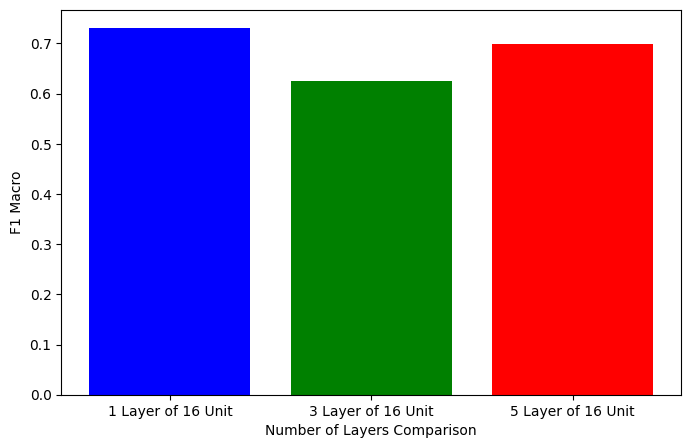

In [10]:
plt.figure(figsize=(8, 5))
plt.bar(['1 Layer of 16 Unit', '3 Layer of 16 Unit', '5 Layer of 16 Unit'], 
        [result_1_1['f1_macro'], result_1_2['f1_macro'], result_1_3['f1_macro']], 
        color=['blue', 'green', 'red'])
plt.xlabel('Number of Layers Comparison')
plt.ylabel('F1 Macro')

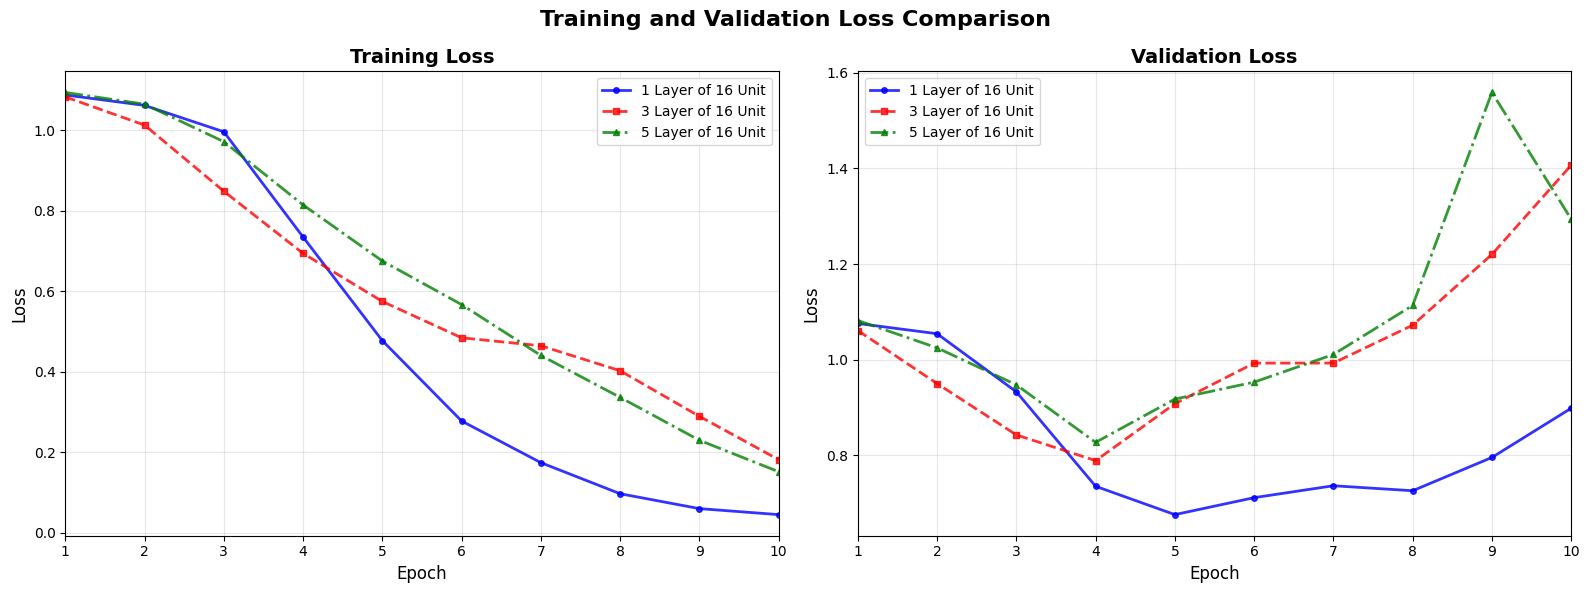

In [11]:
plot_loss_curves(
    history_1_1,
    history_1_2,
    history_1_3,
    labels=["1 Layer of 16 Unit", "3 Layer of 16 Unit", "5 Layer of 16 Unit"]
)

## Test 2 : Cell Count

In [12]:
config_2_1 = {
    'embedding_dim': 128,
    'lstm_layers': [16],
    'bidirectional': True,
    'dropout_rate': 0.5,
    'num_classes': 3
}

config_2_2 = {
    'embedding_dim': 128,
    'lstm_layers': [64],
    'bidirectional': True,
    'dropout_rate': 0.5,
    'num_classes': 3
}

config_2_3 = {
    'embedding_dim': 128,
    'lstm_layers': [256],
    'bidirectional': True,
    'dropout_rate': 0.5,
    'num_classes': 3
}

In [13]:
keras_model_2_1 = build_lstm_model(
    vectorizer=vectorizer,
    embedding_dim=config_2_1['embedding_dim'],
    lstm_layers=config_2_1['lstm_layers'],
    bidirectional=config_2_1['bidirectional'],
    dropout_rate=config_2_1['dropout_rate'],
    num_classes=config_2_1['num_classes']
)
keras_model_2_2 = build_lstm_model(
    vectorizer=vectorizer,
    embedding_dim=config_2_2['embedding_dim'],
    lstm_layers=config_2_2['lstm_layers'],
    bidirectional=config_2_2['bidirectional'],
    dropout_rate=config_2_2['dropout_rate'],
    num_classes=config_2_2['num_classes']
)
keras_model_2_3 = build_lstm_model(
    vectorizer=vectorizer,
    embedding_dim=config_2_3['embedding_dim'],
    lstm_layers=config_2_3['lstm_layers'],
    bidirectional=config_2_3['bidirectional'],
    dropout_rate=config_2_3['dropout_rate'],
    num_classes=config_2_3['num_classes']
)

In [14]:
history_2_1 = keras_model_2_1.fit(
    train_ds_vectorized,
    validation_data=val_ds_vectorized,
    epochs=10,
    verbose=1
)
history_2_2 = keras_model_2_2.fit(
    train_ds_vectorized,
    validation_data=val_ds_vectorized,
    epochs=10,
    verbose=1
)
history_2_3 = keras_model_2_3.fit(
    train_ds_vectorized,
    validation_data=val_ds_vectorized,
    epochs=10,
    verbose=1
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.3387 - loss: 1.0929 - val_accuracy: 0.5400 - val_loss: 1.0644
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4591 - loss: 1.0368 - val_accuracy: 0.5500 - val_loss: 0.9656
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6459 - loss: 0.8707 - val_accuracy: 0.5500 - val_loss: 0.8764
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7049 - loss: 0.7479 - val_accuracy: 0.6300 - val_loss: 0.8214
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7789 - loss: 0.5890 - val_accuracy: 0.6700 - val_loss: 0.7682
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8469 - loss: 0.4571 - val_accuracy: 0.7200 - val_loss: 0.7634
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9291 - loss: 0.2903 - val_accuracy: 0.7100 - val_loss: 0.8490
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9688 - loss: 0.1759 - val_accuracy: 0.6800 - v

In [15]:
result_2_1 = evaluate_model(keras_model_2_1, test_ds_vectorized)
result_2_2 = evaluate_model(keras_model_2_2, test_ds_vectorized)
result_2_3 = evaluate_model(keras_model_2_3, test_ds_vectorized)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


In [16]:
print("Result of Keras LSTM 1 Layer of 16 Unit:")
print("Accuracy: ", result_2_1['accuracy'])
print("F1 Macro: ", result_2_1['f1_macro'])

print("\nResult of Keras LSTM 1 Layer of 64 Unit:")
print("Accuracy: ", result_2_2['accuracy'])
print("F1 Macro: ", result_2_2['f1_macro'])

print("\nResult of Keras LSTM 1 Layer of 256 Unit:")
print("Accuracy: ", result_2_3['accuracy'])
print("F1 Macro: ", result_2_3['f1_macro'])


Result of Keras LSTM 1 Layer of 16 Unit:
Accuracy:  0.7075
F1 Macro:  0.6683373261541624

Result of Keras LSTM 1 Layer of 64 Unit:
Accuracy:  0.715
F1 Macro:  0.709834462962862

Result of Keras LSTM 1 Layer of 256 Unit:
Accuracy:  0.7325
F1 Macro:  0.7269951840385277


Text(0, 0.5, 'F1 Macro')

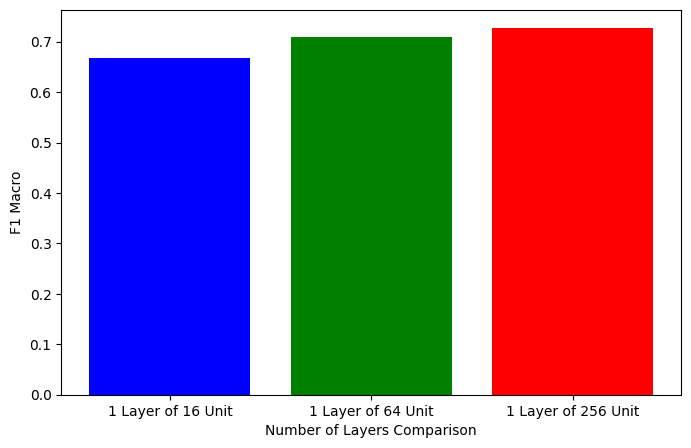

In [17]:
plt.figure(figsize=(8, 5))
plt.bar(['1 Layer of 16 Unit', '1 Layer of 64 Unit', '1 Layer of 256 Unit'], 
        [result_2_1['f1_macro'], result_2_2['f1_macro'], result_2_3['f1_macro']], 
        color=['blue', 'green', 'red'])
plt.xlabel('Number of Layers Comparison')
plt.ylabel('F1 Macro')


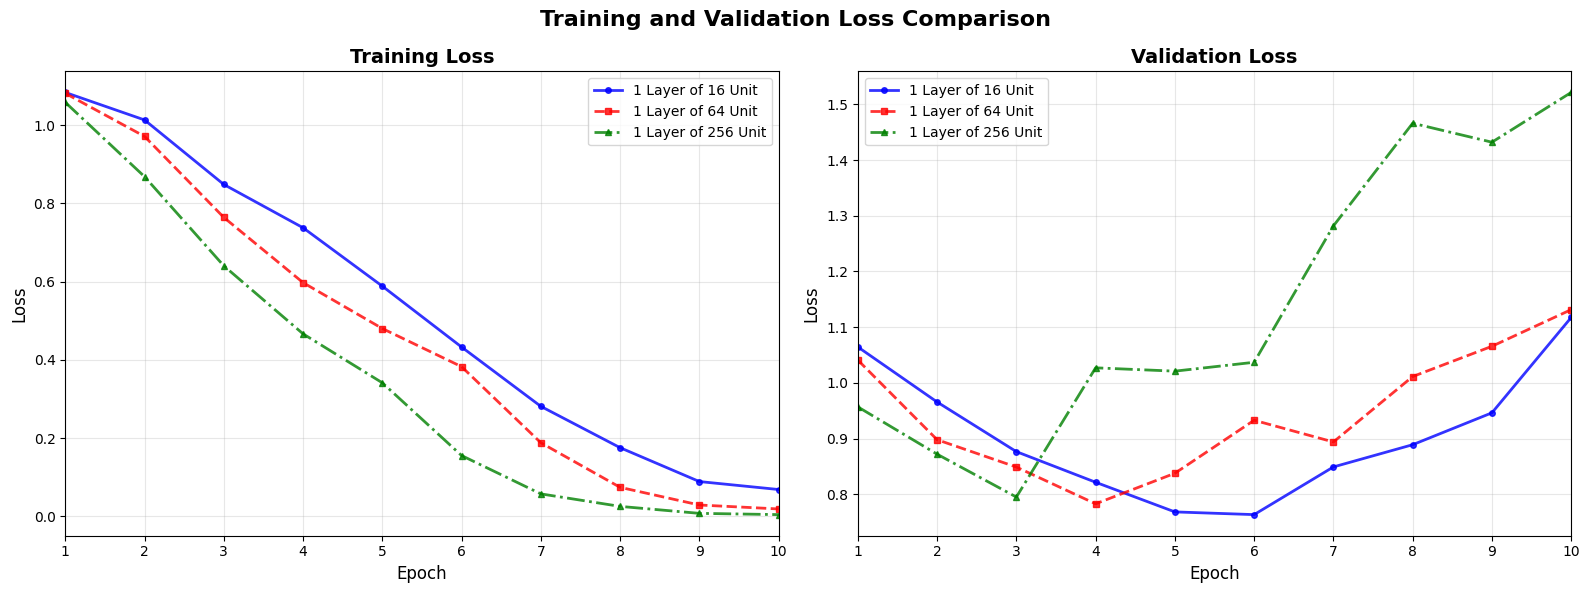

In [18]:
plot_loss_curves(
    history_2_1,
    history_2_2,
    history_2_3,
    labels=["1 Layer of 16 Unit", "1 Layer of 64 Unit", "1 Layer of 256 Unit"]
)

## Test 3 : Directional

In [19]:
config_3_1 = {
    'embedding_dim': 128,
    'lstm_layers': [16],
    'bidirectional': False,
    'dropout_rate': 0.5,
    'num_classes': 3
}
config_3_2 = {
    'embedding_dim': 128,
    'lstm_layers': [16],
    'bidirectional': True,
    'dropout_rate': 0.5,
    'num_classes': 3
}

In [20]:
keras_model_3_1 = build_lstm_model(
    vectorizer=vectorizer,
    embedding_dim=config_3_1['embedding_dim'],
    lstm_layers=config_3_1['lstm_layers'],
    bidirectional=config_3_1['bidirectional'],
    dropout_rate=config_3_1['dropout_rate'],
    num_classes=config_3_1['num_classes']
)
keras_model_3_2 = build_lstm_model(
    vectorizer=vectorizer,
    embedding_dim=config_3_2['embedding_dim'],
    lstm_layers=config_3_2['lstm_layers'],
    bidirectional=config_3_2['bidirectional'],
    dropout_rate=config_3_2['dropout_rate'],
    num_classes=config_3_2['num_classes']
)

In [21]:
history_3_1 = keras_model_3_1.fit(
    train_ds_vectorized,
    validation_data=val_ds_vectorized,
    epochs=10,
    verbose=1
)
history_3_2 = keras_model_3_2.fit(
    train_ds_vectorized,
    validation_data=val_ds_vectorized,
    epochs=10,
    verbose=1
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3955 - loss: 1.0959 - val_accuracy: 0.3800 - val_loss: 1.0827
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3948 - loss: 1.0849 - val_accuracy: 0.3800 - val_loss: 1.0789
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3849 - loss: 1.0845 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3500 - loss: 1.0848 - val_accuracy: 0.3800 - val_loss: 1.0791
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3819 - loss: 1.0865 - val_accuracy: 0.3800 - val_loss: 1.0800
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3734 - loss: 1.0854 - val_accuracy: 0.3800 - val_loss: 1.0806
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3848 - loss: 1.0831 - val_accuracy: 0.3800 - val_loss: 1.0812
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3754 - loss: 1.0841 - val_accuracy: 0.3800 - v

In [22]:
result_3_1 = evaluate_model(keras_model_3_1, test_ds_vectorized)
result_3_2 = evaluate_model(keras_model_3_2, test_ds_vectorized)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [23]:
print("Result of Keras Unidirectional LSTM 1 Layer of 16 Unit:")
print("Accuracy: ", result_3_1['accuracy'])
print("F1 Macro: ", result_3_1['f1_macro'])

print("\nResult of Keras Bidirectional LSTM 1 Layer of 16 Unit:")
print("Accuracy: ", result_3_2['accuracy'])
print("F1 Macro: ", result_3_2['f1_macro'])

Result of Keras Unidirectional LSTM 1 Layer of 16 Unit:
Accuracy:  0.3825
F1 Macro:  0.1844484629294756

Result of Keras Bidirectional LSTM 1 Layer of 16 Unit:
Accuracy:  0.7425
F1 Macro:  0.7305526113211783


Text(0, 0.5, 'F1 Macro')

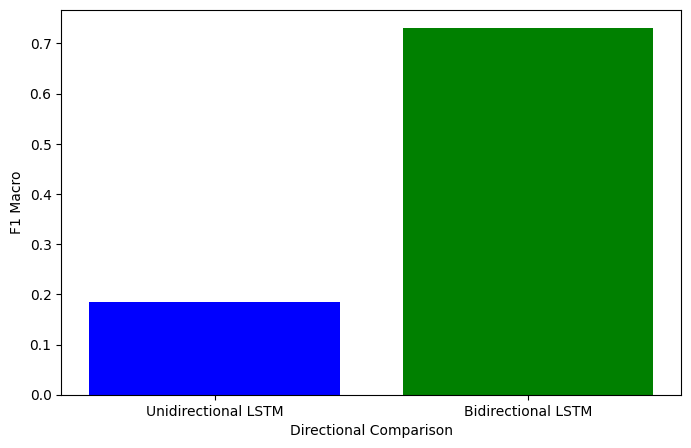

In [24]:
plt.figure(figsize=(8, 5))
plt.bar(['Unidirectional LSTM', 'Bidirectional LSTM'], 
        [result_3_1['f1_macro'], result_3_2['f1_macro']], 
        color=['blue', 'green'])
plt.xlabel('Directional Comparison')
plt.ylabel('F1 Macro')


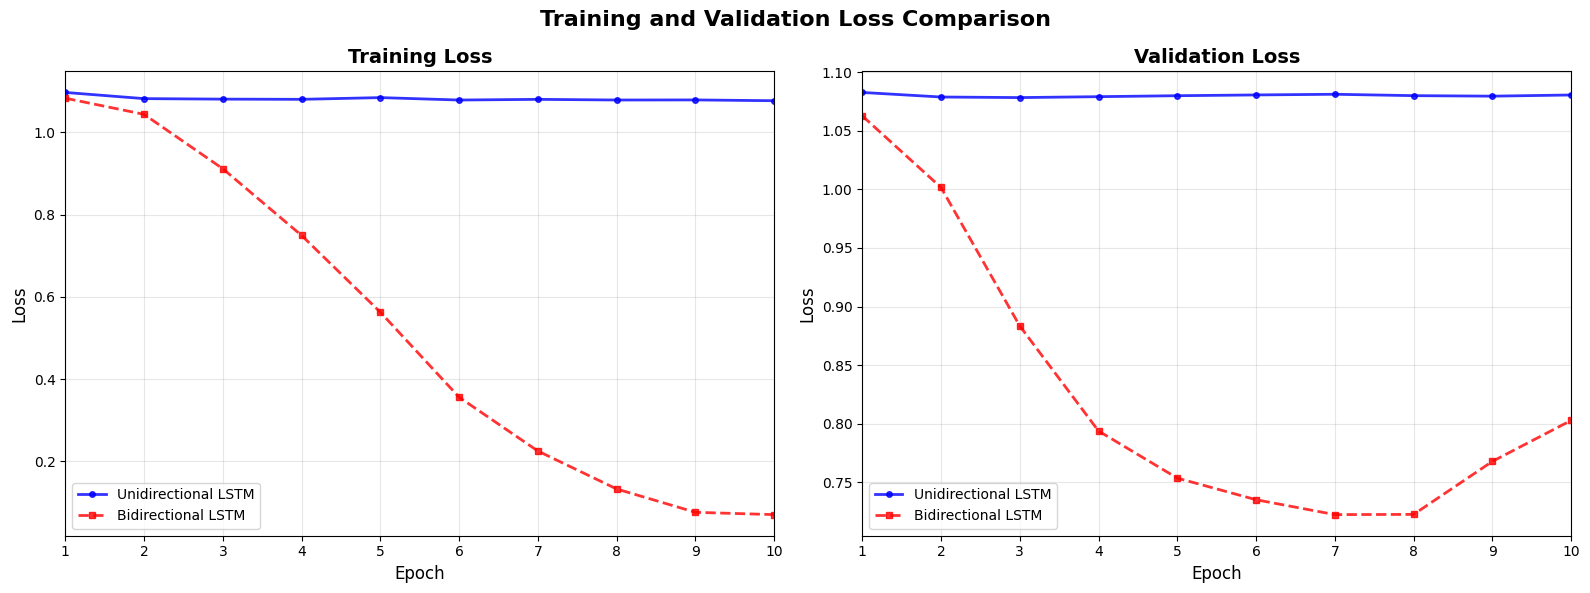

In [25]:
plot_loss_curves(
    history_3_1,
    history_3_2,
    labels=["Unidirectional LSTM", "Bidirectional LSTM"]
)

## Test 4 : Forward Scratch

In [26]:
config = {
    'data_path': 'data/nusax_sentiment_id',
    'batch_size': 32,
    'max_tokens': 20000,
    'sequence_length': 128,
    'embedding_dim': 128,
    'lstm_layers': [256],
    'bidirectional': True,
    'dropout_rate': 0.5,
    'num_classes': 3,
    'epochs': 10,
}

In [27]:
# Build model
custom_model = LSTMModel(
    vocab_size=vocab_size,
    embedding_dim=config['embedding_dim'],
    lstm_layers=config['lstm_layers'],
    bidirectional=config['bidirectional'],
    num_classes=config['num_classes'],
)

keras_model = build_lstm_model(
    vectorizer=vectorizer,
    embedding_dim=config['embedding_dim'],
    lstm_layers=config['lstm_layers'],
    bidirectional=config['bidirectional'],
    dropout_rate=config['dropout_rate'],
    num_classes=config['num_classes']
)

In [28]:
history = keras_model.fit(
    train_ds_vectorized,
    validation_data=val_ds_vectorized,
    epochs=config['epochs'],
    verbose=1
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - accuracy: 0.4151 - loss: 1.0823 - val_accuracy: 0.5400 - val_loss: 0.9669
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 318ms/step - accuracy: 0.5483 - loss: 0.8857 - val_accuracy: 0.6200 - val_loss: 0.8907
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step - accuracy: 0.7202 - loss: 0.6548 - val_accuracy: 0.6300 - val_loss: 0.8048
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 252ms/step - accuracy: 0.7768 - loss: 0.4847 - val_accuracy: 0.6000 - val_loss: 1.0613
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 309ms/step - accuracy: 0.8744 - loss: 0.3373 - val_accuracy: 0.6200 - val_loss: 1.3784
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 259ms/step - accuracy: 0.8879 - loss: 0.3567 - val_accuracy: 0.6200 - val_loss: 0.9190
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 386ms/step - accuracy: 0.9213 - loss: 0.2908 - val_accuracy: 0.6800 - val_loss: 1.0294
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 418ms/step - accuracy: 0.9708 - loss: 0.1642 - val_accuracy: 0.

In [29]:
custom_model.set_weights_from_keras(keras_model)

In [30]:
all_test_inputs = []
all_test_labels = []

for batch in test_ds_vectorized:
    batch_inputs, batch_labels = batch
    all_test_inputs.append(batch_inputs.numpy())
    all_test_labels.append(batch_labels.numpy())

full_test_inputs = np.concatenate(all_test_inputs, axis=0)
full_test_labels = np.concatenate(all_test_labels, axis=0)

In [31]:
keras_pred = keras_model.predict(full_test_inputs, verbose=0)
custom_pred = custom_model.forward(full_test_inputs)

In [32]:
max_diff = np.max(np.abs(keras_pred - custom_pred))
mean_diff = np.mean(np.abs(keras_pred - custom_pred))
std_diff = np.std(np.abs(keras_pred - custom_pred))

print(f"Max difference: {max_diff:.8f}")
print(f"Mean difference: {mean_diff:.8f}")
print(f"Std difference: {std_diff:.8f}")

# Calculate class-wise prediction differences
keras_pred_classes = np.argmax(keras_pred, axis=1)
custom_pred_classes = np.argmax(custom_pred, axis=1)

full_prediction_agreement = np.mean(keras_pred_classes == custom_pred_classes)
print(f"\nDataset prediction agreement: {full_prediction_agreement:.4f}\n")

# Analyze differences by class
for class_id in range(config['num_classes']):
    class_mask = full_test_labels == class_id
    if np.any(class_mask):
        class_diff = np.mean(np.abs(keras_pred[class_mask] - custom_pred[class_mask]))
        class_agreement = np.mean(keras_pred_classes[class_mask] == custom_pred_classes[class_mask])
        print(f"Class {class_id} - Mean diff: {class_diff:.6f}, Agreement: {class_agreement:.4f}")

Max difference: 0.00000578
Mean difference: 0.00000012
Std difference: 0.00000028

Dataset prediction agreement: 1.0000

Class 0 - Mean diff: 0.000000, Agreement: 1.0000
Class 1 - Mean diff: 0.000000, Agreement: 1.0000
Class 2 - Mean diff: 0.000000, Agreement: 1.0000


In [33]:
keras_results = evaluate_model(
    model=keras_model,
    test_dataset=test_ds_vectorized,
    vectorizer=None
)

custom_predicted_labels = custom_pred_classes
custom_accuracy = accuracy_score(full_test_labels, custom_predicted_labels)
custom_f1_macro = f1_score(full_test_labels, custom_predicted_labels, average='macro')
custom_f1_weighted = f1_score(full_test_labels, custom_predicted_labels, average='weighted')

custom_results = {
    'accuracy': custom_accuracy,
    'f1_macro': custom_f1_macro,
    'f1_weighted': custom_f1_weighted,
    'predictions': custom_predicted_labels,
    'true_labels': full_test_labels
}

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step


In [34]:
print("")
print("="*60)
print("RESULTS COMPARISON")
print("="*60)

print(f"Keras LSTM Results:")
print(f"  Accuracy:    {keras_results['accuracy']:.4f}")
print(f"  F1 Macro:    {keras_results['f1_macro']:.4f}")

print(f"Custom LSTM Results:")
print(f"  Accuracy:    {custom_results['accuracy']:.4f}")
print(f"  F1 Macro:    {custom_results['f1_macro']:.4f}")

acc_diff = abs(keras_results['accuracy'] - custom_results['accuracy'])
f1_diff = abs(keras_results['f1_macro'] - custom_results['f1_macro'])

print(f"Differences:")
print(f"  Accuracy Difference:  {acc_diff:.4f}")
print(f"  F1 Macro Difference:  {f1_diff:.4f}")


RESULTS COMPARISON
Keras LSTM Results:
  Accuracy:    0.7200
  F1 Macro:    0.7086
Custom LSTM Results:
  Accuracy:    0.7200
  F1 Macro:    0.7086
Differences:
  Accuracy Difference:  0.0000
  F1 Macro Difference:  0.0000


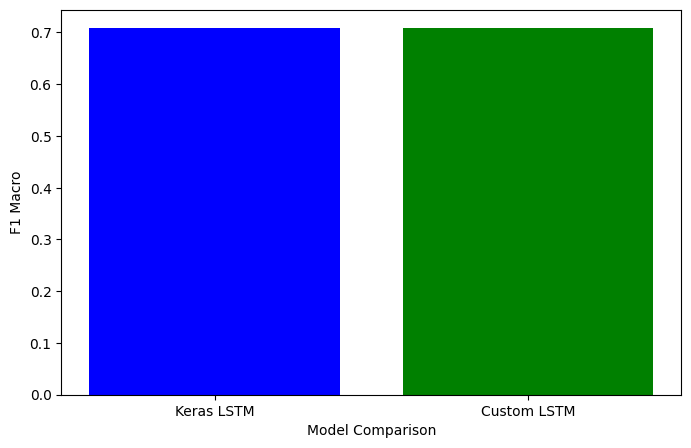

In [35]:
plt.figure(figsize=(8, 5))
plt.bar(['Keras LSTM', 'Custom LSTM'], 
        [keras_results['f1_macro'], custom_results['f1_macro']], 
        color=['blue', 'green'])
plt.xlabel('Model Comparison')
plt.ylabel('F1 Macro')
plt.show()